### EDA and the Application of Machine Learning on Online Shop Customer Behaviour

In [1]:
#Import Statements - Revelant libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#Read the data
df1 = pd.read_csv("e-shop clothing 2008.csv", delimiter=';')

In [3]:
#Load the first 3 rows
df1.head(3)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1


In [4]:
# Define the column renaming mapping
column_renaming = {
    'order': 'clicks_per_session',
    'page 1 (main category)': 'page_1_product_category',
    'page 2 (clothing model)': 'page_2_clothing_model',
    'price 2': 'price_above_avg',
    'page': 'site_page_num',
    'model photography': 'model_photography'
}

# Rename the columns
df1 = df1.rename(columns=column_renaming)

In [5]:
#Get the shape of the data
df1.shape

(165474, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   clicks_per_session       165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page_1_product_category  165474 non-null  int64 
 7   page_2_clothing_model    165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model_photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price_above_avg          165474 non-null  int64 
 13  site_page_num            165474 non-null  int64 
dtypes: int64(13), object

In [7]:
# Columns to keep as original types (year, order, and price)
columns_to_exclude = ['year', 'clicks_per_session', 'price']

# Convert all other columns to string
for column in df1.columns:
    if column not in columns_to_exclude:
        df1[column] = df1[column].astype(str)

# Display the DataFrame to verify the changes
print(df1.dtypes)

year                        int64
month                      object
day                        object
clicks_per_session          int64
country                    object
session ID                 object
page_1_product_category    object
page_2_clothing_model      object
colour                     object
location                   object
model_photography          object
price                       int64
price_above_avg            object
site_page_num              object
dtype: object


Reading the data set documentation revealed the country column to contain unnecessary values that must be dropped.

In [8]:
# Drop rows where 'country' column has values 43, 44, 45, 46, or 47
values_to_drop = ['43', '44', '45', '46', '47']
df1 = df1[~df1['country'].isin(values_to_drop)]

In [23]:
# Define the mapping from numeric codes to country names
country_mapping = {
    1: "Australia", 2: "Austria", 3: "Belgium", 4: "British Virgin Islands",
    5: "Cayman Islands", 6: "Christmas Island", 7: "Croatia", 8: "Cyprus",
    9: "Czech Republic", 10: "Denmark", 11: "Estonia", 12: "unidentified",
    13: "Faroe Islands", 14: "Finland", 15: "France", 16: "Germany",
    17: "Greece", 18: "Hungary", 19: "Iceland", 20: "India",
    21: "Ireland", 22: "Italy", 23: "Latvia", 24: "Lithuania",
    25: "Luxembourg", 26: "Mexico", 27: "Netherlands", 28: "Norway",
    29: "Poland", 30: "Portugal", 31: "Romania", 32: "Russia",
    33: "San Marino", 34: "Slovakia", 35: "Slovenia", 36: "Spain",
    37: "Sweden", 38: "Switzerland", 39: "Ukraine", 40: "United Arab Emirates",
    41: "United Kingdom", 42: "USA"
}

# Replace the numeric country codes with the country names
df1['country'] = df1['country'].astype(int).replace(country_mapping)

In [24]:
# Define the mapping from numeric codes to colour names
colour_mapping = {
    1: "beige", 2: "black", 3: "blue", 4: "brown", 5: "burgundy",
    6: "gray", 7: "green", 8: "navy blue", 9: "of many colors", 10: "olive",
    11: "pink", 12: "red", 13: "violet", 14: "white"
}

# Replace the numeric colour codes with the colour names
df1['colour'] = df1['colour'].astype(int).replace(colour_mapping)

In [11]:
# Define the mapping from numeric codes to month names
month_mapping = {
    4: "April", 5: "May",
    6: "June", 7: "July", 8: "August"
}

# Replace the numeric month codes with the month names
df1['month'] = df1['month'].astype(int).replace(month_mapping)

In [25]:
# Define the mapping from numeric codes to product names
page1_mapping = {
    1: "Trousers", 2: "Skirts",
    3: "Blouses", 4: "Sale"
}

# Replace the numeric product codes with the product names
df1['page_1_product_category'] = df1['page_1_product_category'].astype(int).replace(page1_mapping)

In [26]:
# Define the mapping from numeric codes to location names
location_mapping = {
    1: "top left", 2: "top in the middle", 3: "top right", 4: "bottom left", 5: "bottom in the middle",
    6: "bottom right"
}

# Replace the numeric colour codes with the colour names
df1['location'] = df1['location'].astype(int).replace(location_mapping)

In [27]:
# Define the mapping from numeric codes to model photography names
model_photography_mapping = {
    1: "en-face", 2: "profile"
}

# Replace the numeric model photography codes with the model photography names
df1['model_photography'] = df1['model_photography'].astype(int).replace(model_photography_mapping)

In [28]:
# Define the mapping from numeric codes to model photography names
price_above_avg_mapping = {
    1: "yes", 2: "no"
}

# Replace the numeric model photography codes with the model photography names
df1['price_above_avg'] = df1['price_above_avg'].astype(int).replace(price_above_avg_mapping)

In [29]:
df1['clicks_per_session'] = df1['clicks_per_session'].astype(int)

In [30]:
#Using groupby method to view the sum and mean performance of clicks per session by different product categories by months
df1.groupby(["month", "page_1_product_category"])["clicks_per_session"].agg({'sum','mean'})

sum       mean
month  page_1_product_category                   
April  Blouses                  116856  10.616517
       Sale                     144060  12.611398
       Skirts                    85668   7.966152
       Trousers                 106847   7.646676
August Blouses                   44652  14.006274
       Sale                      57032  14.515653
       Skirts                    23137   8.525055
       Trousers                  37734   9.379567
July   Blouses                   87345  11.443076
       Sale                     112932  12.578748
       Skirts                    58024   8.109574
       Trousers                  81062   7.698196
June   Blouses                   89419  11.871880
       Sale                      78419  11.881667
       Skirts                    62327   7.782120
       Trousers                  67392   7.311707
May    Blouses                   91066  11.044997
       Sale                      98593  13.630997
       Skirts                    66823   7.661431
       Trousers                  89264   8.375305

In [31]:
#Using groupby method to view the mean performance of clicks per session by different product categories
df1.groupby(["page_1_product_category"])["clicks_per_session"].mean().sort_values(ascending = False)

page_1_product_category
Sale        12.866808
Blouses     11.417046
Skirts       7.923623
Trousers     7.898576
Name: clicks_per_session, dtype: float64

In [32]:
#Using groupby method to view the sum and mean performance of clicks per session by different months - Trend View
df1.groupby(["month"])["clicks_per_session"].mean().sort_values(ascending = False)

month
August    11.733434
May        9.918699
July       9.895119
April      9.615349
June       9.489030
Name: clicks_per_session, dtype: float64

In [33]:
#Using groupby to view mean price by product category
df1.groupby(["page_1_product_category"])["price"].mean().sort_values(ascending = False)

page_1_product_category
Skirts      51.191251
Trousers    46.702961
Blouses     40.308151
Sale        36.223463
Name: price, dtype: float64

In [34]:
#Clicks per session by Country or origin of visitors to the e-commerce site   ------ Top 10
df1.groupby(["country"])["clicks_per_session"].sum().sort_values(ascending = False)[:10]

country
Poland            1273028
Czech Republic     209624
Lithuania           56088
Germany             13252
Slovakia            10572
Ireland              6947
United Kingdom       4584
Romania              3344
Belgium              3271
unidentified         2407
Name: clicks_per_session, dtype: int32

In [35]:
#Clicks per session by Country or origin of visitors to the e-commerce site   ------ Least 10
df1.groupby(["country"])["clicks_per_session"].sum().sort_values(ascending = False)[-10:]

country
Portugal                  11
Cayman Islands            10
San Marino                 6
Slovenia                   6
Australia                  6
Faroe Islands              3
Mexico                     3
Cyprus                     1
United Arab Emirates       1
British Virgin Islands     1
Name: clicks_per_session, dtype: int32

In [36]:
#Clicks per session by model photography in the site
df1.groupby(["model_photography"])["clicks_per_session"].sum().sort_values(ascending = False)

model_photography
en-face    1121677
profile     476975
Name: clicks_per_session, dtype: int32

In [37]:
#Creating a new data frame to extract product categories whose prices are above the average price of all categories
df_price_avg = df1[["price_above_avg","page_1_product_category", "price"]]
df_price_avg.head()

,price_above_avg,page_1_product_category,price
0,no,Trousers,28
1,no,Trousers,33
2,yes,Skirts,52
3,no,Skirts,38
4,yes,Skirts,52


In [38]:
# Filter out rows where product category is 'price is above average'
filtered_df_price_avg = df_price_avg.loc[df_price_avg['price_above_avg'] == 'yes']

# Group by category and calculate the sum of values
grouped_result = filtered_df_price_avg.groupby('page_1_product_category')['price'].sum()

print(grouped_result)

page_1_product_category
Blouses     1054811
Sale         862118
Skirts      1380813
Trousers    1073190
Name: price, dtype: int64


In [39]:
# Define month mapping from names to numbers to create a new column of Week Day Name
month_mapping = {'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8}

# Convert month names to month numbers
df1['month'] = df1['month'].replace(month_mapping)

# Create the date column using pd.Timestamp
df1['date'] = pd.to_datetime(df1[['year', 'month', 'day']])

# Extract the weekday name from the date column
df1['Week_Day_Name'] = df1['date'].dt.day_name()

In [40]:
#Mean clicks per session by Week day Names
df1.groupby(["Week_Day_Name"])["clicks_per_session"].mean().sort_values(ascending = False)

Week_Day_Name
Sunday       10.811002
Thursday     10.715417
Wednesday     9.942656
Saturday      9.886666
Tuesday       9.822288
Friday        9.248990
Monday        9.029753
Name: clicks_per_session, dtype: float64

In [41]:
#Duplicating the Data Frame in readiness for the Machine Learning Task
df2 = df1.copy()

In [44]:
df2.columns

Index(['year', 'month', 'day', 'clicks_per_session', 'country', 'session ID',
       'page_1_product_category', 'page_2_clothing_model', 'colour',
       'location', 'model_photography', 'price', 'price_above_avg',
       'site_page_num', 'date', 'Week_Day_Name'],
      dtype='object')

### Random Forest Model Building to Predict Price

In [56]:
df2_randf = df2[["price", "page_1_product_category", "colour", "model_photography"]]

In [65]:
pd.options.mode.chained_assignment = None

In [66]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the categorical features
df2_randf['page_1_product_category'] = le.fit_transform(df2_randf['page_1_product_category'])
df2_randf['colour'] = le.fit_transform(df2_randf['colour'])
df2_randf['model_photography'] = le.fit_transform(df2_randf['model_photography'])

In [58]:
# Define feature variables (X) and the target variable (y)
X = df2_randf.drop(['price'], axis=1)
y = df2_randf['price']

In [59]:
y = df2_randf["price"]
X = df2_randf.copy()
X = X.drop("price", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [60]:
# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(121142, 3) (40381, 3) (121142,) (40381,)


In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Make predictions
y_pred = rf.predict(X_test)

In [64]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 83.18
R^2 Score: 0.47


In [ ]:
#### Useing Box Plot to Guage the relationship between product categories and colours on Prices

In [67]:
# Assuming df2 is your DataFrame
allowed_colours = ["black", "blue", "violet", "red", "gray", "beige", "white"]

# Filter the DataFrame to keep only the specified colours
df2_colour = df2[df2["colour"].isin(allowed_colours)]

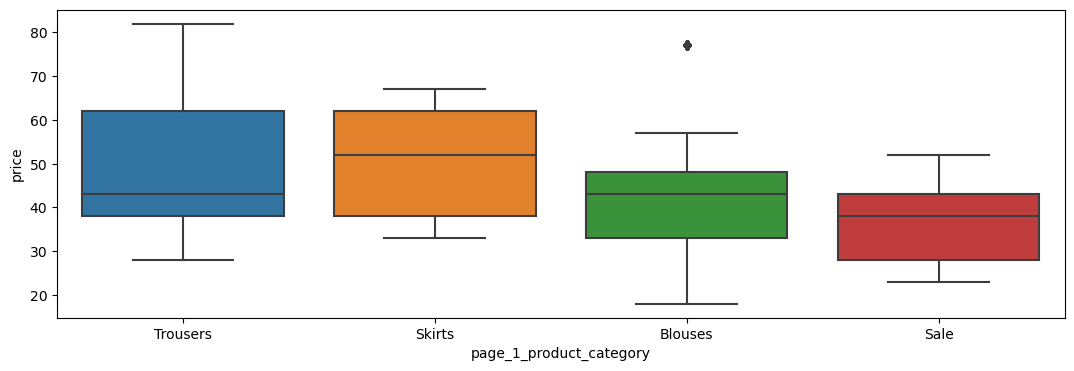

In [69]:
import seaborn as sns
plt.figure(figsize=(13,4))
ax = sns.boxplot(x="page_1_product_category", y="price", data=df2_colour)

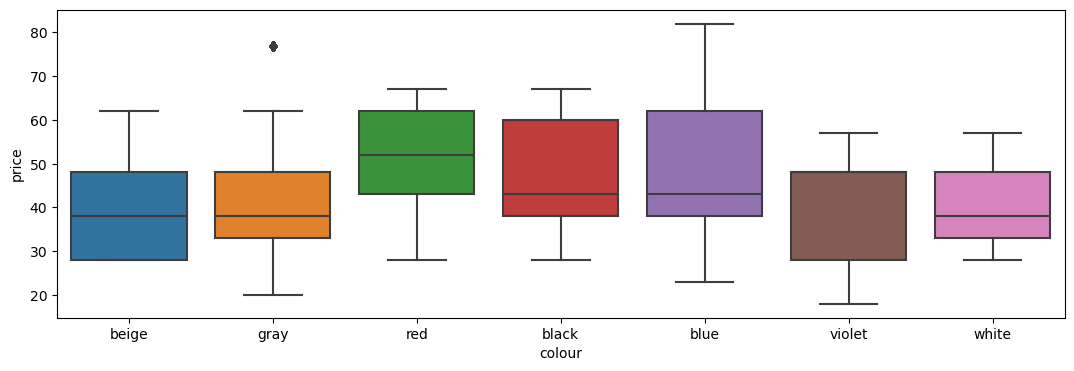

In [70]:
import seaborn as sns
plt.figure(figsize=(13,4))
ax = sns.boxplot(x="colour", y="price", data=df2_colour)

### Building and Regression model to Predict Clicks Per Session

In [336]:
# Define the OLS formula
ols_formula = 'clicks_per_session ~ C(colour) + C(page_1_product_category) + C(model_photography) + C(site_page_num)'

# Create an OLS model
OLS = smf.ols(formula=ols_formula, data=df2_colour)

# Fit the model
model = OLS.fit()

# Save the results summary
model_results = model.summary()

# Print the results summary
print(model_results)

                            OLS Regression Results                            
Dep. Variable:     clicks_per_session   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     438.3
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:32:37   Log-Likelihood:            -4.4924e+05
No. Observations:              112591   AIC:                         8.985e+05
Df Residuals:                  112576   BIC:                         8.987e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

#### Interpretation:
R-squared (0.052): Indicates that approximately 5.2% of the variability in clicks_per_session is explained by the model.
    
F-statistic (438.3): Suggests the model is statistically significant overall (p-value = 0.00).

#### Coefficients:
Intercept (9.3228): Baseline value of clicks_per_session when all categorical variables are at their reference levels.

#### Summary:
Overall Model Fit: The model explains a small proportion (5.2%) of the variance in clicks per session. Despite the low R-squared, the model is statistically significant.

#### Significant Predictors:
Colour: Red, violet, and white products are associated with fewer clicks per session.
Product Category: Sale items increase clicks, while skirts and trousers decrease clicks significantly.
Site Page Number: Pages beyond the first page (2 to 5) see progressively more clicks per session, indicating higher user engagement on deeper site pages.

#### Practical Implications:
Colour Impact: Certain colors (red, white) may need re-evaluation in marketing strategies due to their negative impact on clicks.

Product Categories: Emphasizing sale items can drive more engagement, while skirts and trousers might need better promotion or visibility strategies.

User Engagement: Users tend to click more as they navigate deeper into the site, suggesting that maintaining engaging content and easy navigation can keep users interested.


### What It Means:

Product Colour and Category: Some colours and product categories attract more or fewer clicks. For example, sale items get more attention, while certain categories like skirts and trousers get less.
    
Navigation: Users click more as they go deeper into the site, indicating they are engaged and exploring more.

### Lets formulate a Hypotheses that will be tested by the HSD post hoc test

**H0 (Null Hypothesis): There is no relationship between product category and clicks per session.**

**H1 (Alternative Hypothesis): There is a relationship between product category and clicks per session.**

In [346]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### HSD post hoc test for ANOVA

In [349]:
# Run Tukey's HSD post hoc test for one-way ANOVA to discover statistically the possible significance that exist 
#between the predictor and target variables

tukey_oneway = pairwise_tukeyhsd(endog = df2_colour["clicks_per_session"], groups =df2_colour["page_1_product_category"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Blouses,Sale,0.8659,0.0,0.5457,1.1861,True
Blouses,Skirts,-4.0635,0.0,-4.3739,-3.7531,True
Blouses,Trousers,-3.9895,0.0,-4.2633,-3.7156,True
Sale,Skirts,-4.9294,0.0,-5.2496,-4.6091,True
Sale,Trousers,-4.8553,0.0,-5.1403,-4.5703,True
Skirts,Trousers,0.074,0.8993,-0.1999,0.348,False


#### Now, let's interpret the results based on the hypotheses:

##### Blouses vs. Sale:

Mean Difference (meandiff): 0.8659

Adjusted p-value (p-adj): 0.0 (significant)

##### Interpretation: 
There is a statistically significant difference in mean clicks per session between Blouses and Sale categories. Therefore, we reject the null hypothesis (H0) and accept the alternative hypothesis (H1) that there is a relationship between product category and clicks per session for these two groups.
                                                                                                                                                                                                                                                                                     
Blouses vs. Skirts and Blouses vs. Trousers:

Both comparisons have significant mean differences and p-values of 0.0, indicating a relationship between product category and clicks per session.

Sale vs. Skirts and Sale vs. Trousers:

Both comparisons have significant mean differences and p-values of 0.0, indicating a relationship between product category and clicks per session.

Skirts vs. Trousers:

Mean Difference (meandiff): 0.074

Adjusted p-value (p-adj): 0.8993 (not significant)

#### Interpretation: 

There is no statistically significant difference in mean clicks per session between Skirts and Trousers categories. Therefore, we fail to reject the null hypothesis (H0) and cannot conclude that there is a relationship between product category and clicks per session for these two groups.
                                                                                                                                                                                                                                                                          

In summary, the Tukey HSD test results suggest that there is a relationship between product category and clicks per session for all comparisons except for Skirts vs. Trousers, where the difference in means is not statistically significant.

#### Actionable Insights & Recommendations

Based on the results of the analysis from the Tukey HSD test, here are some recommendations for stakeholders:

Focus on High-Performing Categories:
Allocate more resources and marketing efforts towards product categories that show significantly higher mean clicks per session compared to others.
For example, prioritize promoting Sale items, as they have a statistically significant higher mean clicks per session compared to Blouses, Skirts, and Trousers.

Optimize Low-Performing Categories:
Investigate factors contributing to lower clicks per session in categories like Blouses, Skirts, and Trousers.
Consider redesigning product presentations, improving product descriptions, or offering promotions to increase engagement with these categories.

Segment Marketing Strategies:
Tailor marketing strategies and campaigns based on the insights gained from the analysis.
Customize messaging and promotions for different product categories to better resonate with target audiences.

Evaluate Skirts and Trousers Performance:
Although Skirts and Trousers did not show a significant difference in mean clicks per session, continue monitoring their performance over time.
Conduct further analysis or experiments to understand user preferences and behavior within these categories.

Utilize Data-Driven Decision Making:
Continue using data analytics and statistical tests like Tukey HSD to inform strategic decisions.
Regularly review and update strategies based on new data and insights to adapt to changing market dynamics.

A/B Testing and Experimentation:
Consider implementing A/B testing or controlled experiments to test different marketing approaches and measure their impact on clicks per session.
Use experimental results to refine strategies and optimize performance.
mize performance.


The dataset was taken from UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/553/clickstream+data+for+online+shopping